<img src = "images/UL.png" alt = "Unsupervised Learning" />

# 0722 I05 Unsupervised Learning Bin Liao

**How to prepare the assignment?**
In this assignment you will work individually and independently.

Task 1:
You will create a new notebook with file name "0722 I05 Unsupervised Learning YourFirstName LastName.ipynb". You will include the same file name as Heading 1 in the notebook.

You will choose a suitable open dataset of your interest to demonstrate your grasp on the tasks listed in this assignment. You can search for a dataset on [Free Data Set](https://www.interviewquery.com/blog-free-datasets/) or [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/index.php) or [Kaggle](https://www.kaggle.com/datasets). You can also choose a dataset of your interest other than the ones suggested on the given links. You cannot choose a dataset from any of the libraries in the Python. You will keep your data file in a GitHub repository.
**(2 Marks)**

Task 2:
Please ensure that the dataset has at least three of the five data types viz. float (numeric), int (numeric), datetime64 (Date), logical (Boolean) and object (String). You must run appropriate commands to confirm and report that your dataset indeed fulfils the aforementioned requirement. You can choose to create a new column to fulfil this requirement. You can generate data using random module in the numpy or just type in a new column if it is not available in the dataset chosen by you.
**(2 Marks)**

Task 3:
Perform exploratory data analysis using pandas and scikit library or a library of your choice to understand and describe it. Descriptions can involve five number summary, histograms, boxplots, checking for missing values, checking for outliers etc.
**(2 Marks)**

Task 4:
(a)Scale the data using normalization and/or standardization.
(b)Perform Reduce the dimensionality of the data set using Principal Component Analysis (PCA).
(c). Create a suitable visualization to support your PCA analysis.
**(2 Marks)**

Task 5:
(a)Use Elbow method and/or Silhouette Score Method to determine the number of clusters.
(b)Build and implement the K-means clustering model using scikit-learn library.
(c)Visualize the clusters with their centroids using any visualization library.
**(2 Marks)**


**How to submit your assignment?**
You will submit the link to the Colab notebook of your work as your submission. 
**This is a single submission assignment. You cannot resubmit the assignment.**

## Task 1: Data preparation

In this analysis, we are using the "Weather in Szeged 2006-2016" dataset to demonstrate an unsupervised learning approach. The dataset consists of various weather attributes, such as temperature, humidity, wind speed, wind bearing, visibility, etc., recorded from 2006 to 2016 in Szeged, Hungary.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [68]:
# Load data
url = 'https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/datas/weatherHistory.csv'

weather_df = pd.read_csv(url);
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Task 2: Verfiy the data set.


In [69]:
# Data info.
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [70]:
weather_df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

# Summary of Data Types in the "Weather in Szeged 2006-2016" Dataset

The dataset consists of various features, each with a specific data type:

1. `Formatted Date`: This feature is of `object` data type and contains the date and time of the weather observation.

2. `Summary`: This feature is of `object` data type, representing a brief textual summary of the weather conditions at that time.

3. `Precip Type`: This is an `object` data type feature, which shows the type of precipitation (i.e., whether it was rain or snow).

4. `Temperature (C)`: This feature is a `float64` data type, denoting the actual temperature in degrees Celsius.

5. `Apparent Temperature (C)`: This `float64` type feature represents how the temperature feels to humans, which might be different from the actual temperature due to factors such as wind chill or humidity.

6. `Humidity`: This is a `float64` type feature, indicating the humidity level at the time of observation.

7. `Wind Speed (km/h)`: This `float64` type feature represents the wind speed in kilometers per hour.

8. `Wind Bearing (degrees)`: This `float64` type feature shows the direction in which the wind is coming from, in degrees.

9. `Visibility (km)`: This `float64` type feature denotes the visibility in kilometers.

10. `Loud Cover`: This feature is a `float64` type but always contains a value of 0.0, thus effectively acting like a boolean data type.

11. `Pressure (millibars)`: This `float64` type feature represents the atmospheric pressure in millibars.

12. `Daily Summary`: This is an `object` data type feature, providing a summary of the day's weather.

These diverse data types provide a rich basis for our unsupervised learning analysis, allowing us to consider a variety of weather conditions and their interactions.


## Task 3: Exploratory Data Analysis

In [71]:
# Summary statistics
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


From the find number summery, we could find that the value of the 'Loud Cover' are all 0. we could drop it.

In [72]:
# Drop the 'Loud Cover'
weather_df.drop('Loud Cover', inplace=True, axis=1)

In [73]:
# Check for duplicates
duplicate_rows = weather_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 24


From the code it indicates that there are 24 rows of dupicate data. Going to drop the duplicateds.


In [74]:
# Drop duplicates
weather_df = weather_df.drop_duplicates()

print(f"Dataset shape after dropping duplicates: {weather_df.shape}")

Dataset shape after dropping duplicates: (96429, 11)


In [75]:
# Check for missing value
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

From the abouve result, in indicate that only 'Precip Type' contains some missing values. Given that 'Precip Type' is a categorical variable and the missing values are relatively small compared to the size of the dataset, we can choose to fill the missing values with the mode (the most frequent value) in the column.

In [76]:
# Fill missing values with the mode
weather_df['Precip Type'] = weather_df['Precip Type'].fillna(weather_df['Precip Type'].mode()[0])

# Recheck the dataset with empty value.
weather_df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

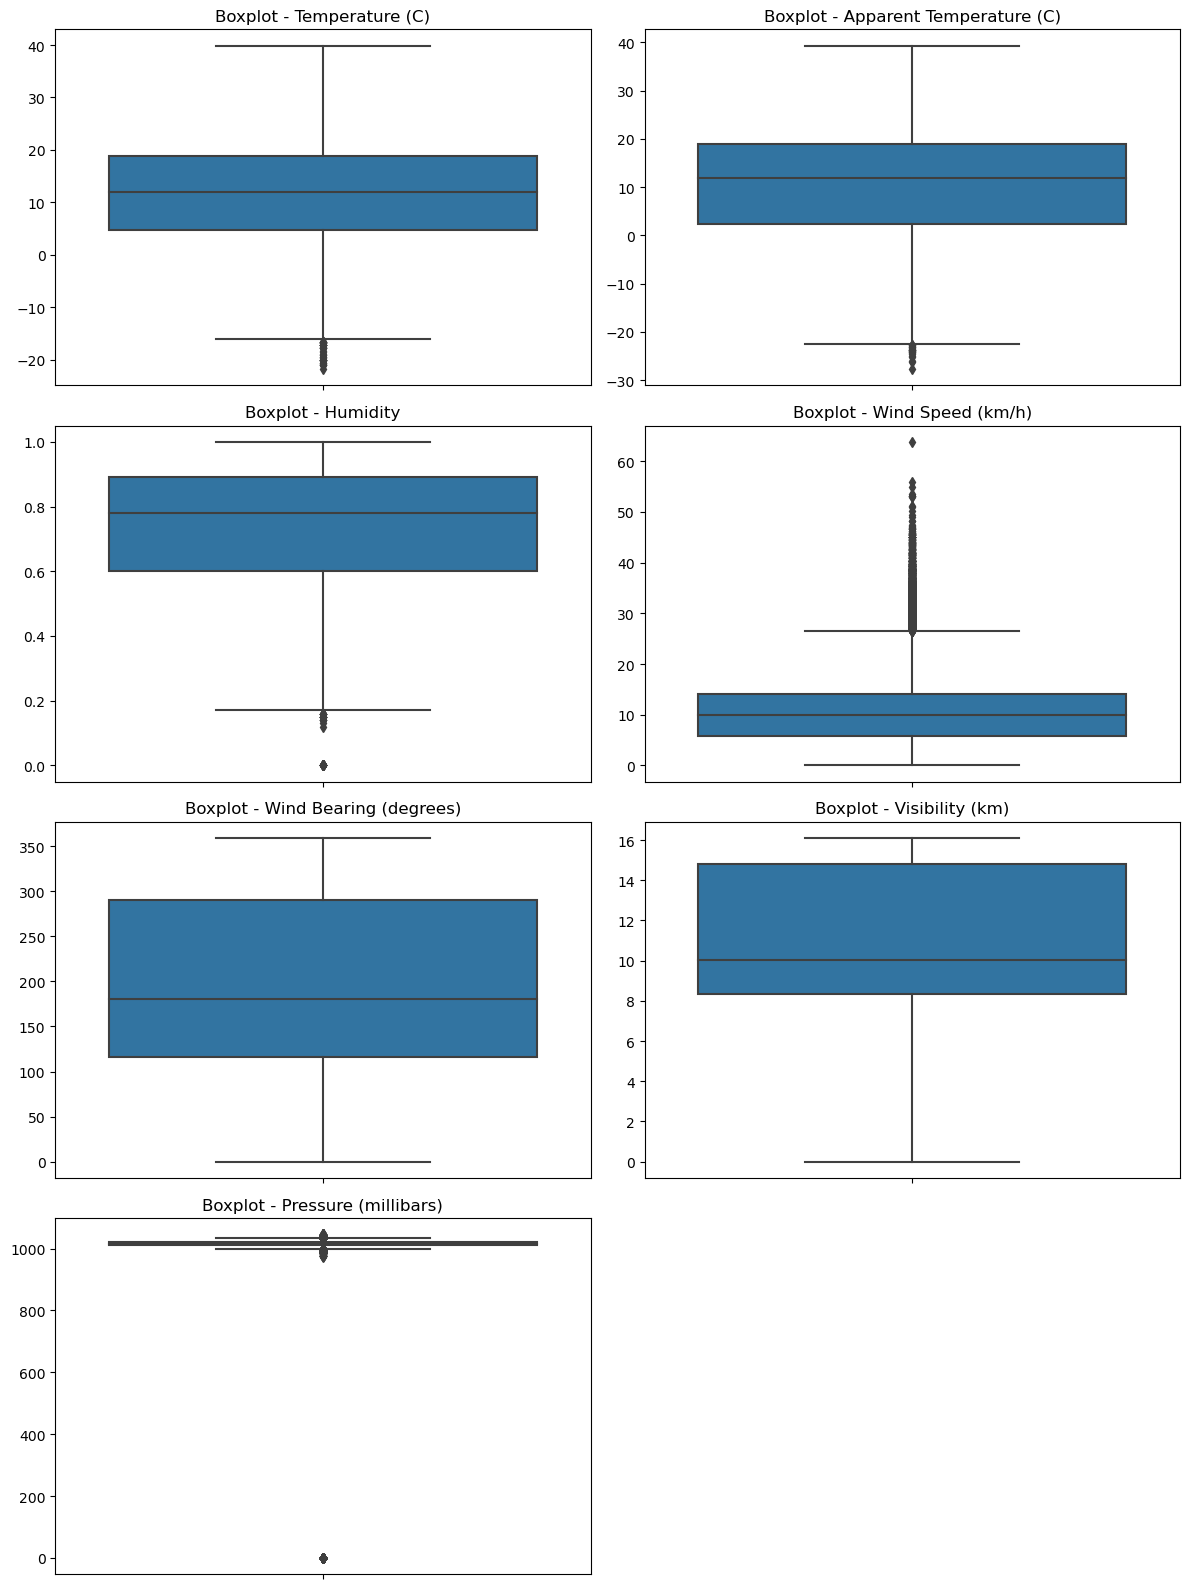

In [77]:
import seaborn as sns

# Check for outliers using box plots
numeric_cols = weather_df.select_dtypes(include=np.number).columns.tolist()
n_rows = len(numeric_cols)//2 + len(numeric_cols)%2
n_cols = 2

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4*n_rows))
axs = axs.flatten()

for ax, column in zip(axs, numeric_cols):
    sns.boxplot(y=weather_df[column], ax=ax)
    ax.set_title(f'Boxplot - {column}')
    ax.set_ylabel('') 

# Remove empty subplots
if len(numeric_cols) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


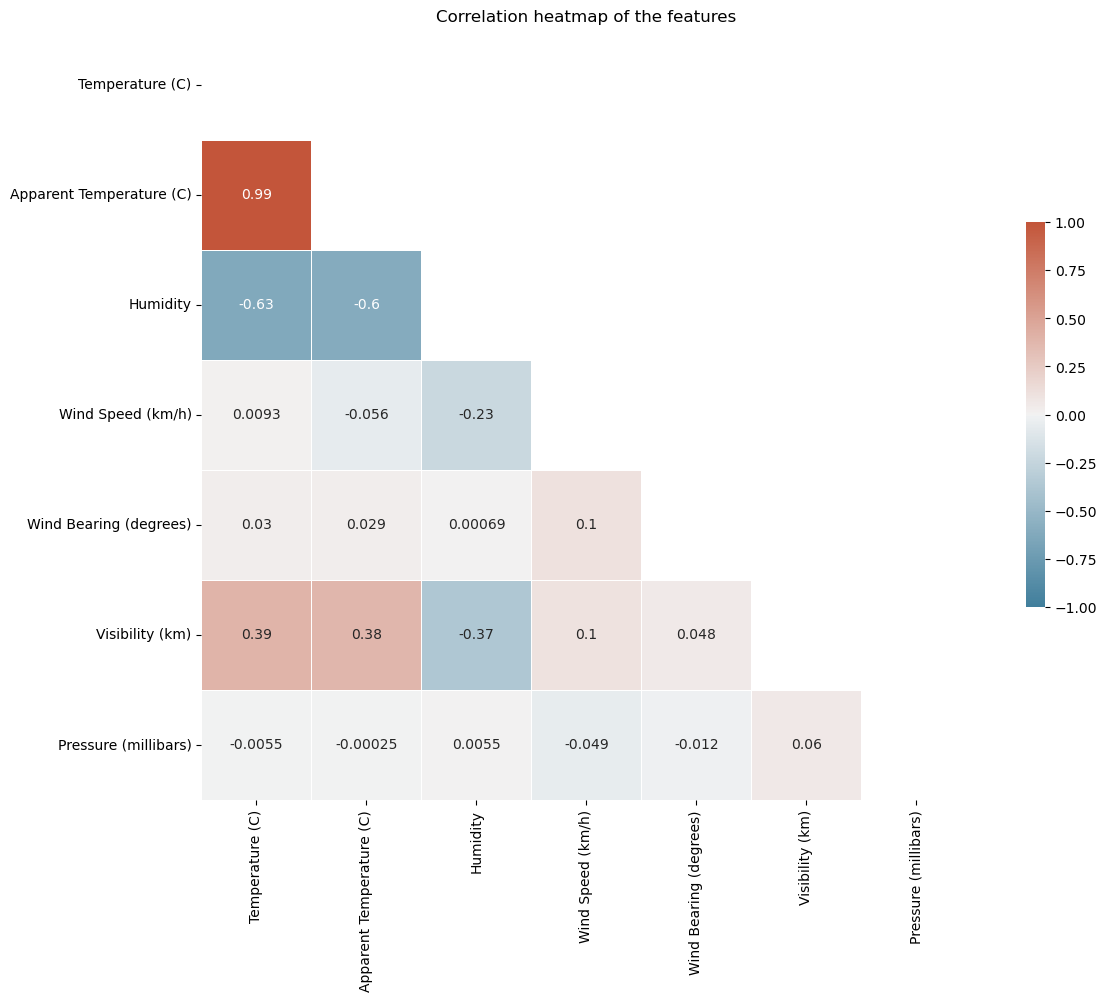

In [78]:

# Compute correlation matrix

corr = weather_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation heatmap of the features')
plt.show()

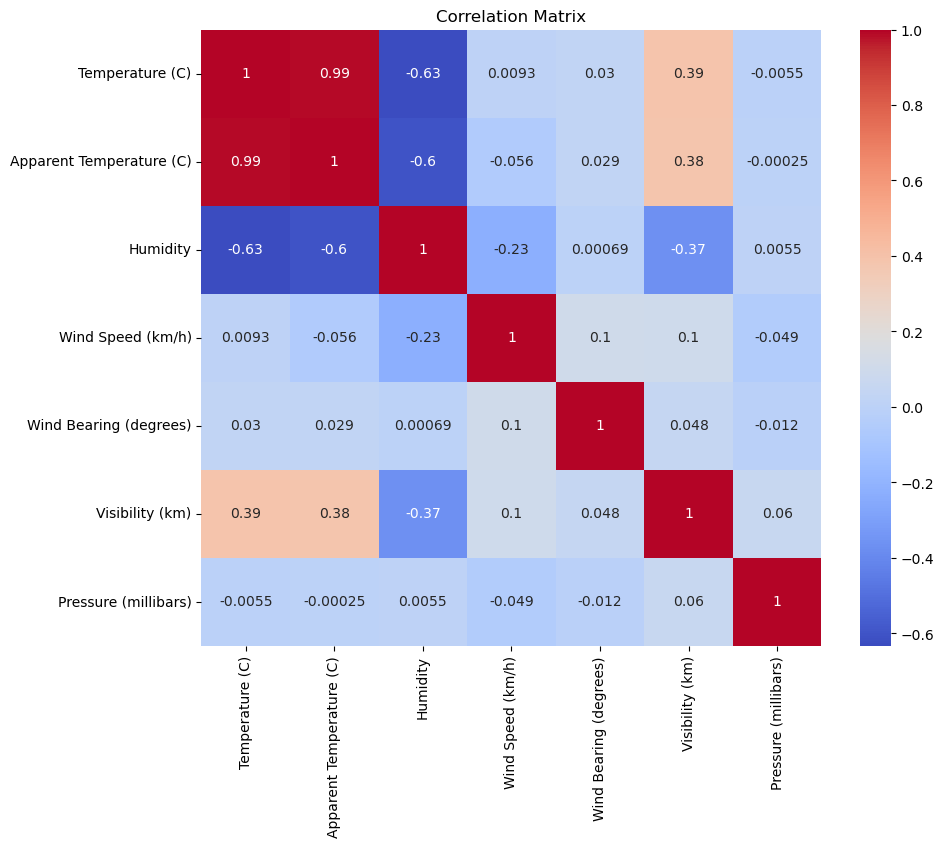

In [79]:
# Correlation Matrix
correlation_matrix = weather_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


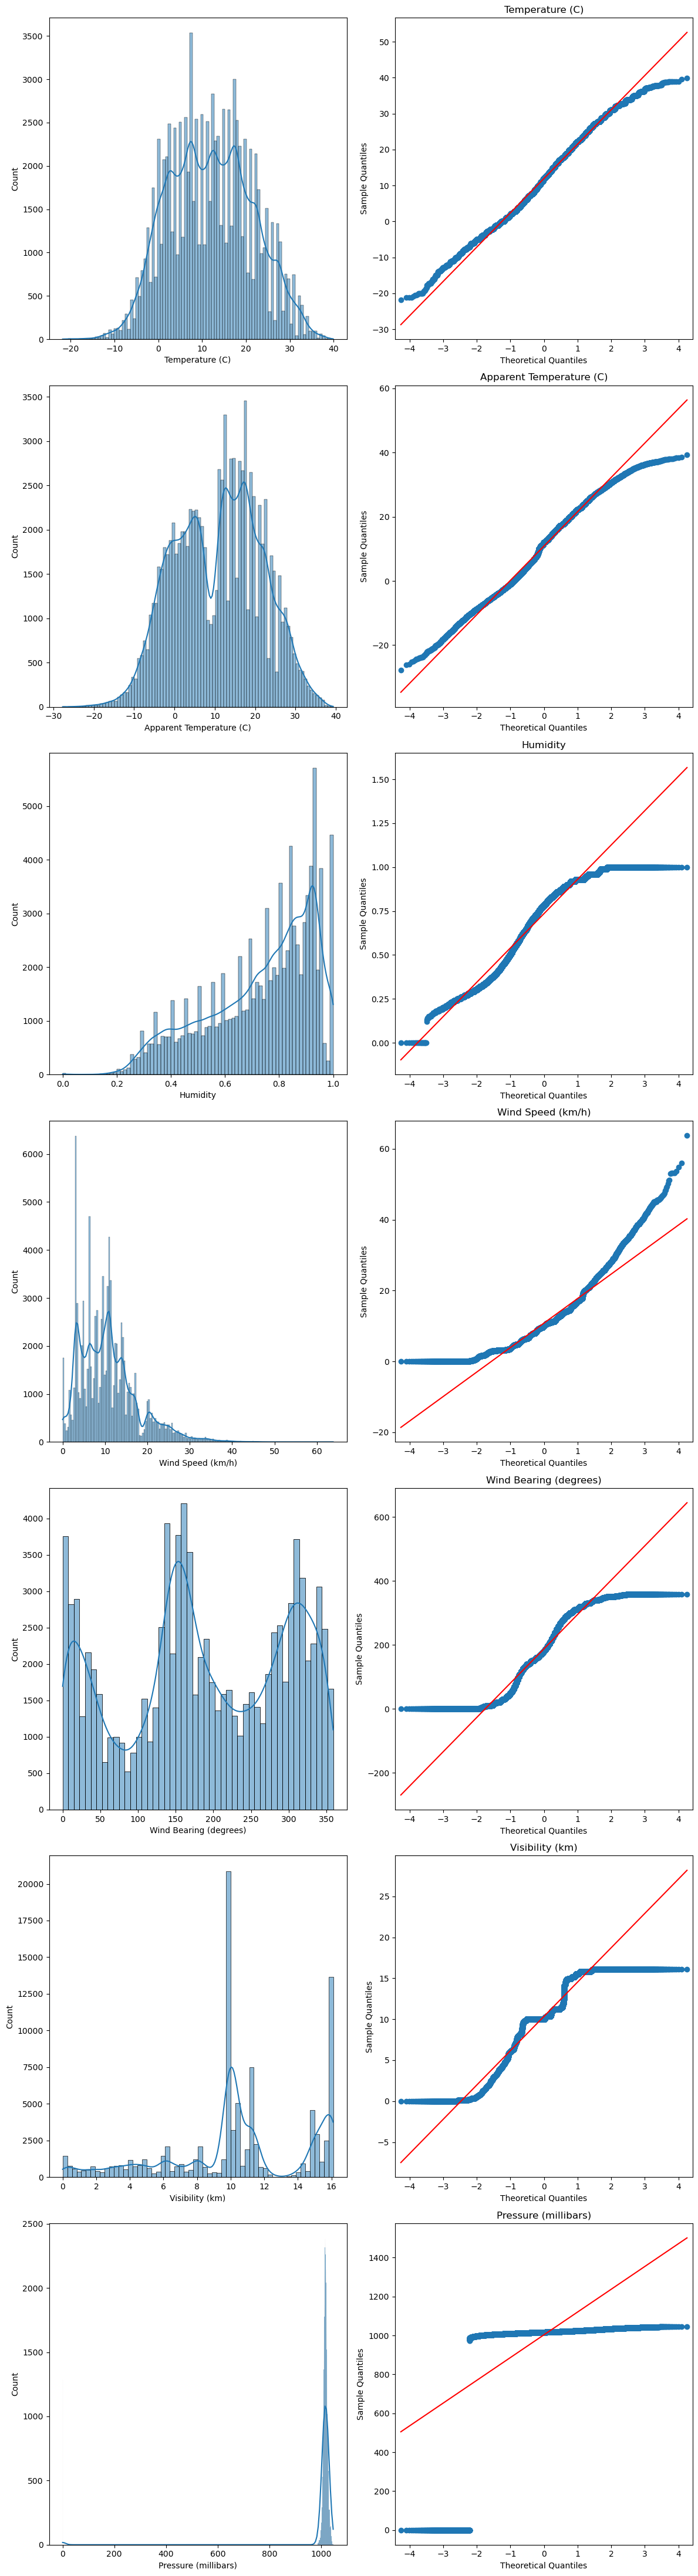

In [80]:
import statsmodels.api as sm
cat_col = ["Summary","Precip Type","Daily Summary"]
num_col = ["Temperature (C)","Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]

fig,axes = plt.subplots(len(num_col),2,figsize=(12, len(weather_df.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(weather_df[col], ax = axes[i,0],kde =True)
    sm.qqplot(weather_df[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

## Task 4: Scalling and PCA

### a. Statdadize the data

In [81]:
# Remove non-numeric columns and NA values
weather_df_num = weather_df.select_dtypes(include=[np.number]).dropna()
# Standardize the data
scaler = StandardScaler()
weather_df_scaled = scaler.fit_transform(weather_df_num)

### b. PCA

In [82]:
# PCA with 2 componets
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(weather_df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

### c. Visualization of PCA

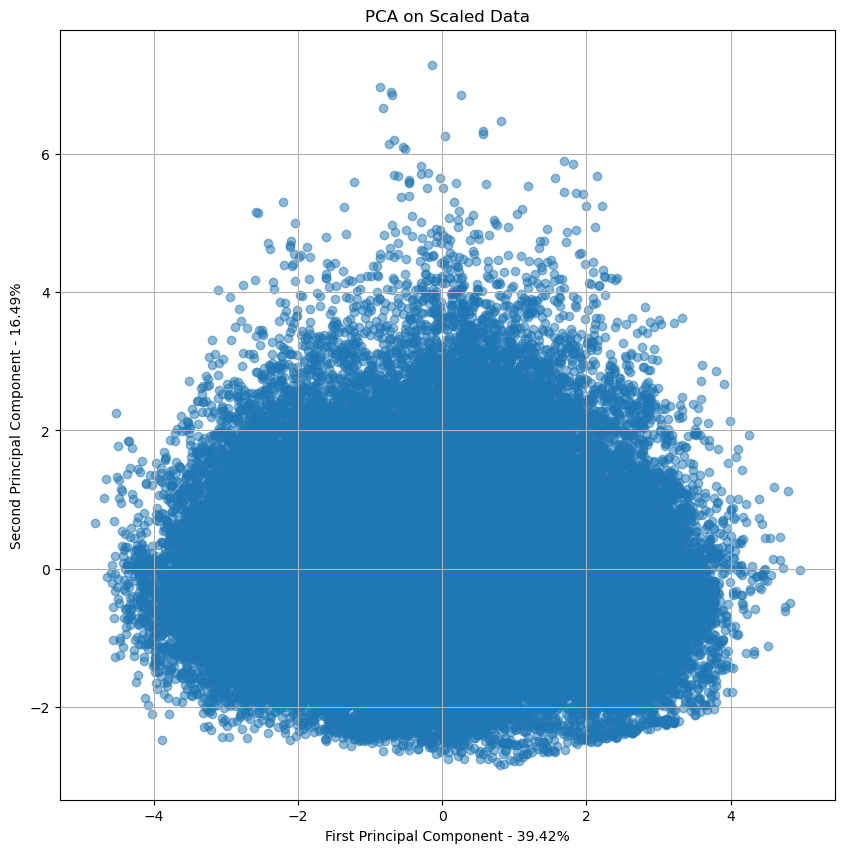

In [83]:
# Visualization of PCA

pca_components = pca.transform(weather_df_scaled)
explained_variance = pca.explained_variance_ratio_

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10,10))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.xlabel('First Principal Component - {:.2%}'.format(explained_variance[0]))
plt.ylabel('Second Principal Component - {:.2%}'.format(explained_variance[1]))
plt.title('PCA on Scaled Data')
plt.grid(True)
plt.show()


### PCA with 95% of the vairance is retained.


Number of components: 6
Explained variance ratio: [0.39415251 0.16489875 0.14421693 0.13493011 0.10268782 0.05839694]


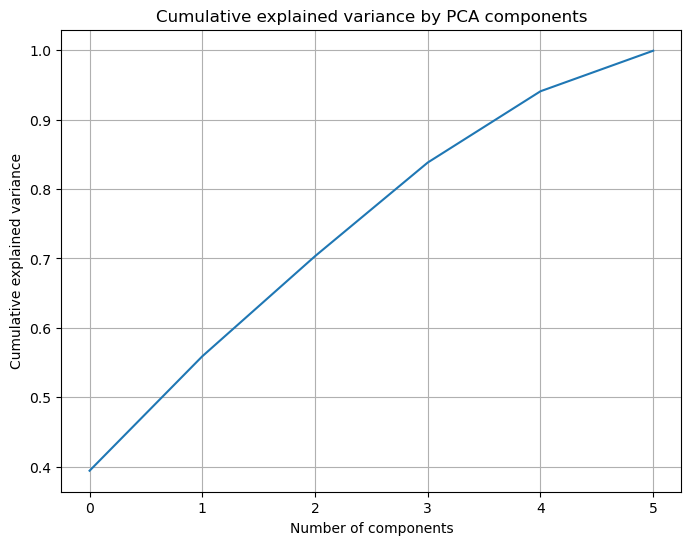

In [84]:
# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(weather_df_scaled)

# Print the number of components actually used
print(f"Number of components: {pca.n_components_}")

# Print the explained variance ratio for these components
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Plot the explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance by PCA components')
plt.grid(True)
plt.show()

The PCA result suggests that 6 principal components are needed to capture 95% of the variance in your data.

The explained variance ratio provides information about the proportion of the dataset's total variance that is captured by each principal component. Here's a brief explanation for each component:

- The first principal component accounts for approximately 39.4% of the total variance in the dataset.
- The second principal component accounts for approximately 16.5% of the total variance.
- The third principal component accounts for approximately 14.4% of the total variance.
- The fourth principal component accounts for approximately 13.5% of the total variance.
- The fifth principal component accounts for approximately 10.3% of the total variance.
- The sixth principal component accounts for approximately 5.8% of the total variance.

This means that these six components collectively account for 95% of the total variance in the dataset, while the remaining components, which were not included due to our threshold, account for only 5% of the total variance. This reduction in dimensionality can help to make subsequent analyses or modeling more efficient, while still retaining most of the information in the original dataset.

## Task 5: Clustering using K-Means

To build the K-Means cluster, we will useing 2 principal components of PCA, then will visualizaing the data in a 2D space.

### a. Use Elbow method and/or Silhousette Score Method to determine the number of cluster

In [85]:
# Determining optimal number of clusters
inertia = []
sil_score = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(principalDf)
    inertia.append(kmeans.inertia_)
    sil_score.append(silhouette_score(principalDf, kmeans.labels_))

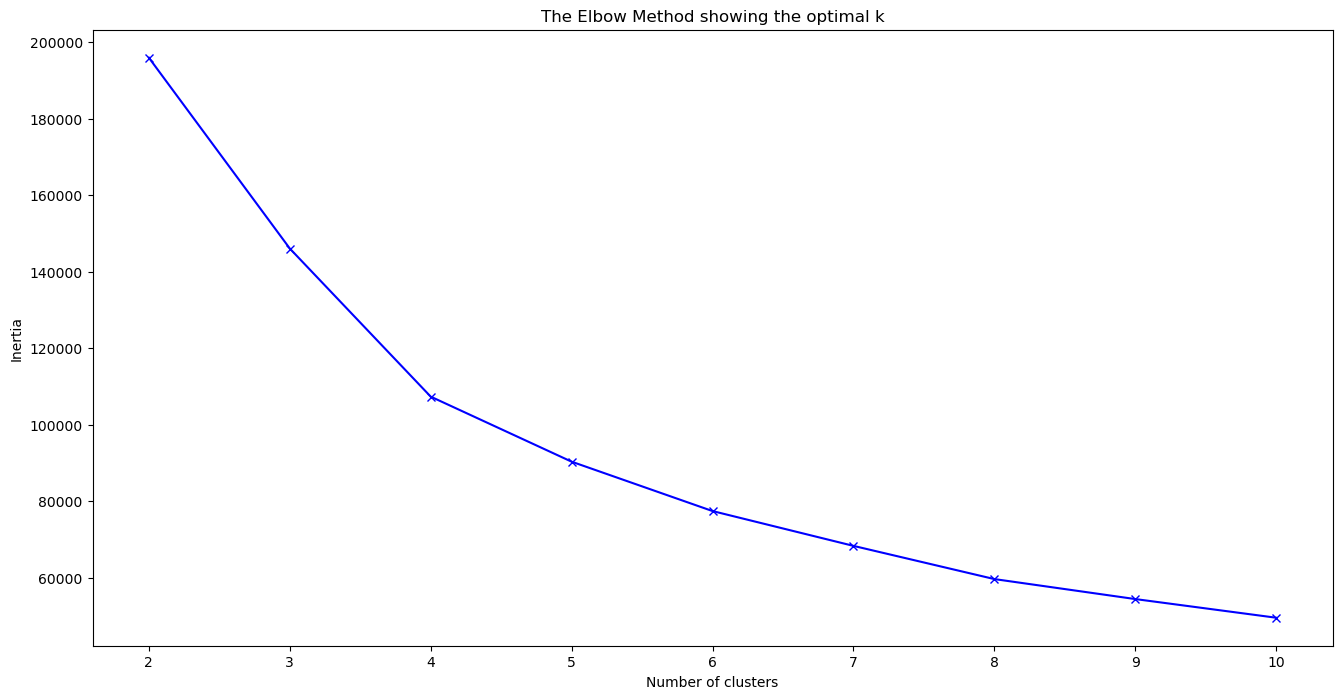

In [86]:
# Plotting Elbow Method
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


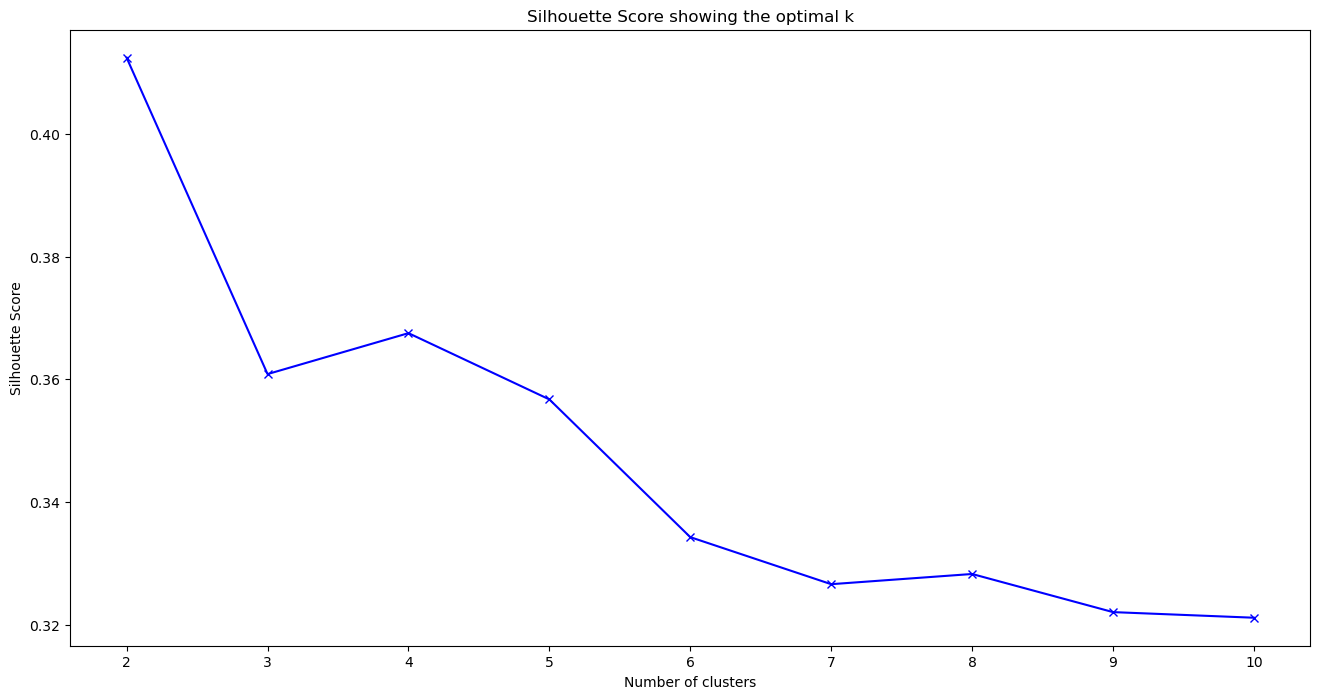

In [87]:
# Plotting Silhouette Score Method
plt.figure(figsize=(16,8))
plt.plot(K, sil_score, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing the optimal k')
plt.show()


From the result of Elbow Method and the Plotting Silhouette Score Method, we will pick **4** clusters.

### b. Building K-means model

In [88]:
# Building K-means model
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)


### c. Visualization of clusters

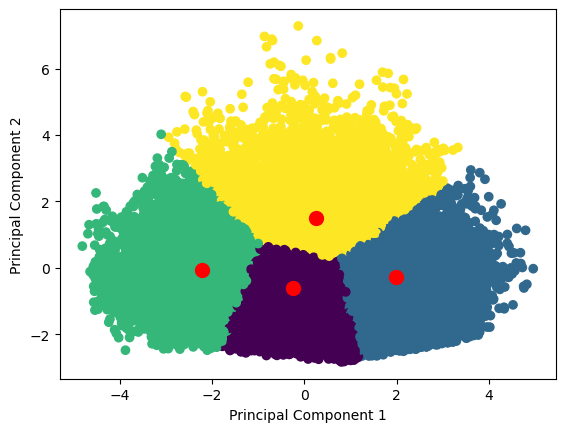

In [89]:
# Visualization of clusters
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()